<a href="https://colab.research.google.com/github/luciaemiliaeu/Nootebooks-Alura/blob/main/Machine_Learning_introdu%C3%A7%C3%A3o_a_algoritmos_n%C3%A3o_supervisionados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Introdução a algoritmos não supervisionados

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

In [2]:
plt.rcParams['figure.figsize'] = (10,6)

## Base de dados Filmes

Carregando a base de dados

In [3]:
uri_filmes = 'https://raw.githubusercontent.com/oyurimatheus/clusterirng/master/movies/movies.csv'
df_filmes = pd.read_csv(uri_filmes)
df_filmes

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


### Pré-processamento

In [4]:
df_filmes.set_index('movieId', drop=True)

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


####Pegando os dummies dos generos. 

A função get_dummies() transforma cada valor possível da coluna em uma nova coluna binária. Assim dados categóricos podem ser utilizados como numéricos.

In [5]:
df_generos = df_filmes['genres'].str.get_dummies()
df_generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df_filmes_data = pd.concat([df_filmes, df_generos], axis=1)
df_filmes_data.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


####Escalonando os dados

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(df_generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

#### Visualizando os dados

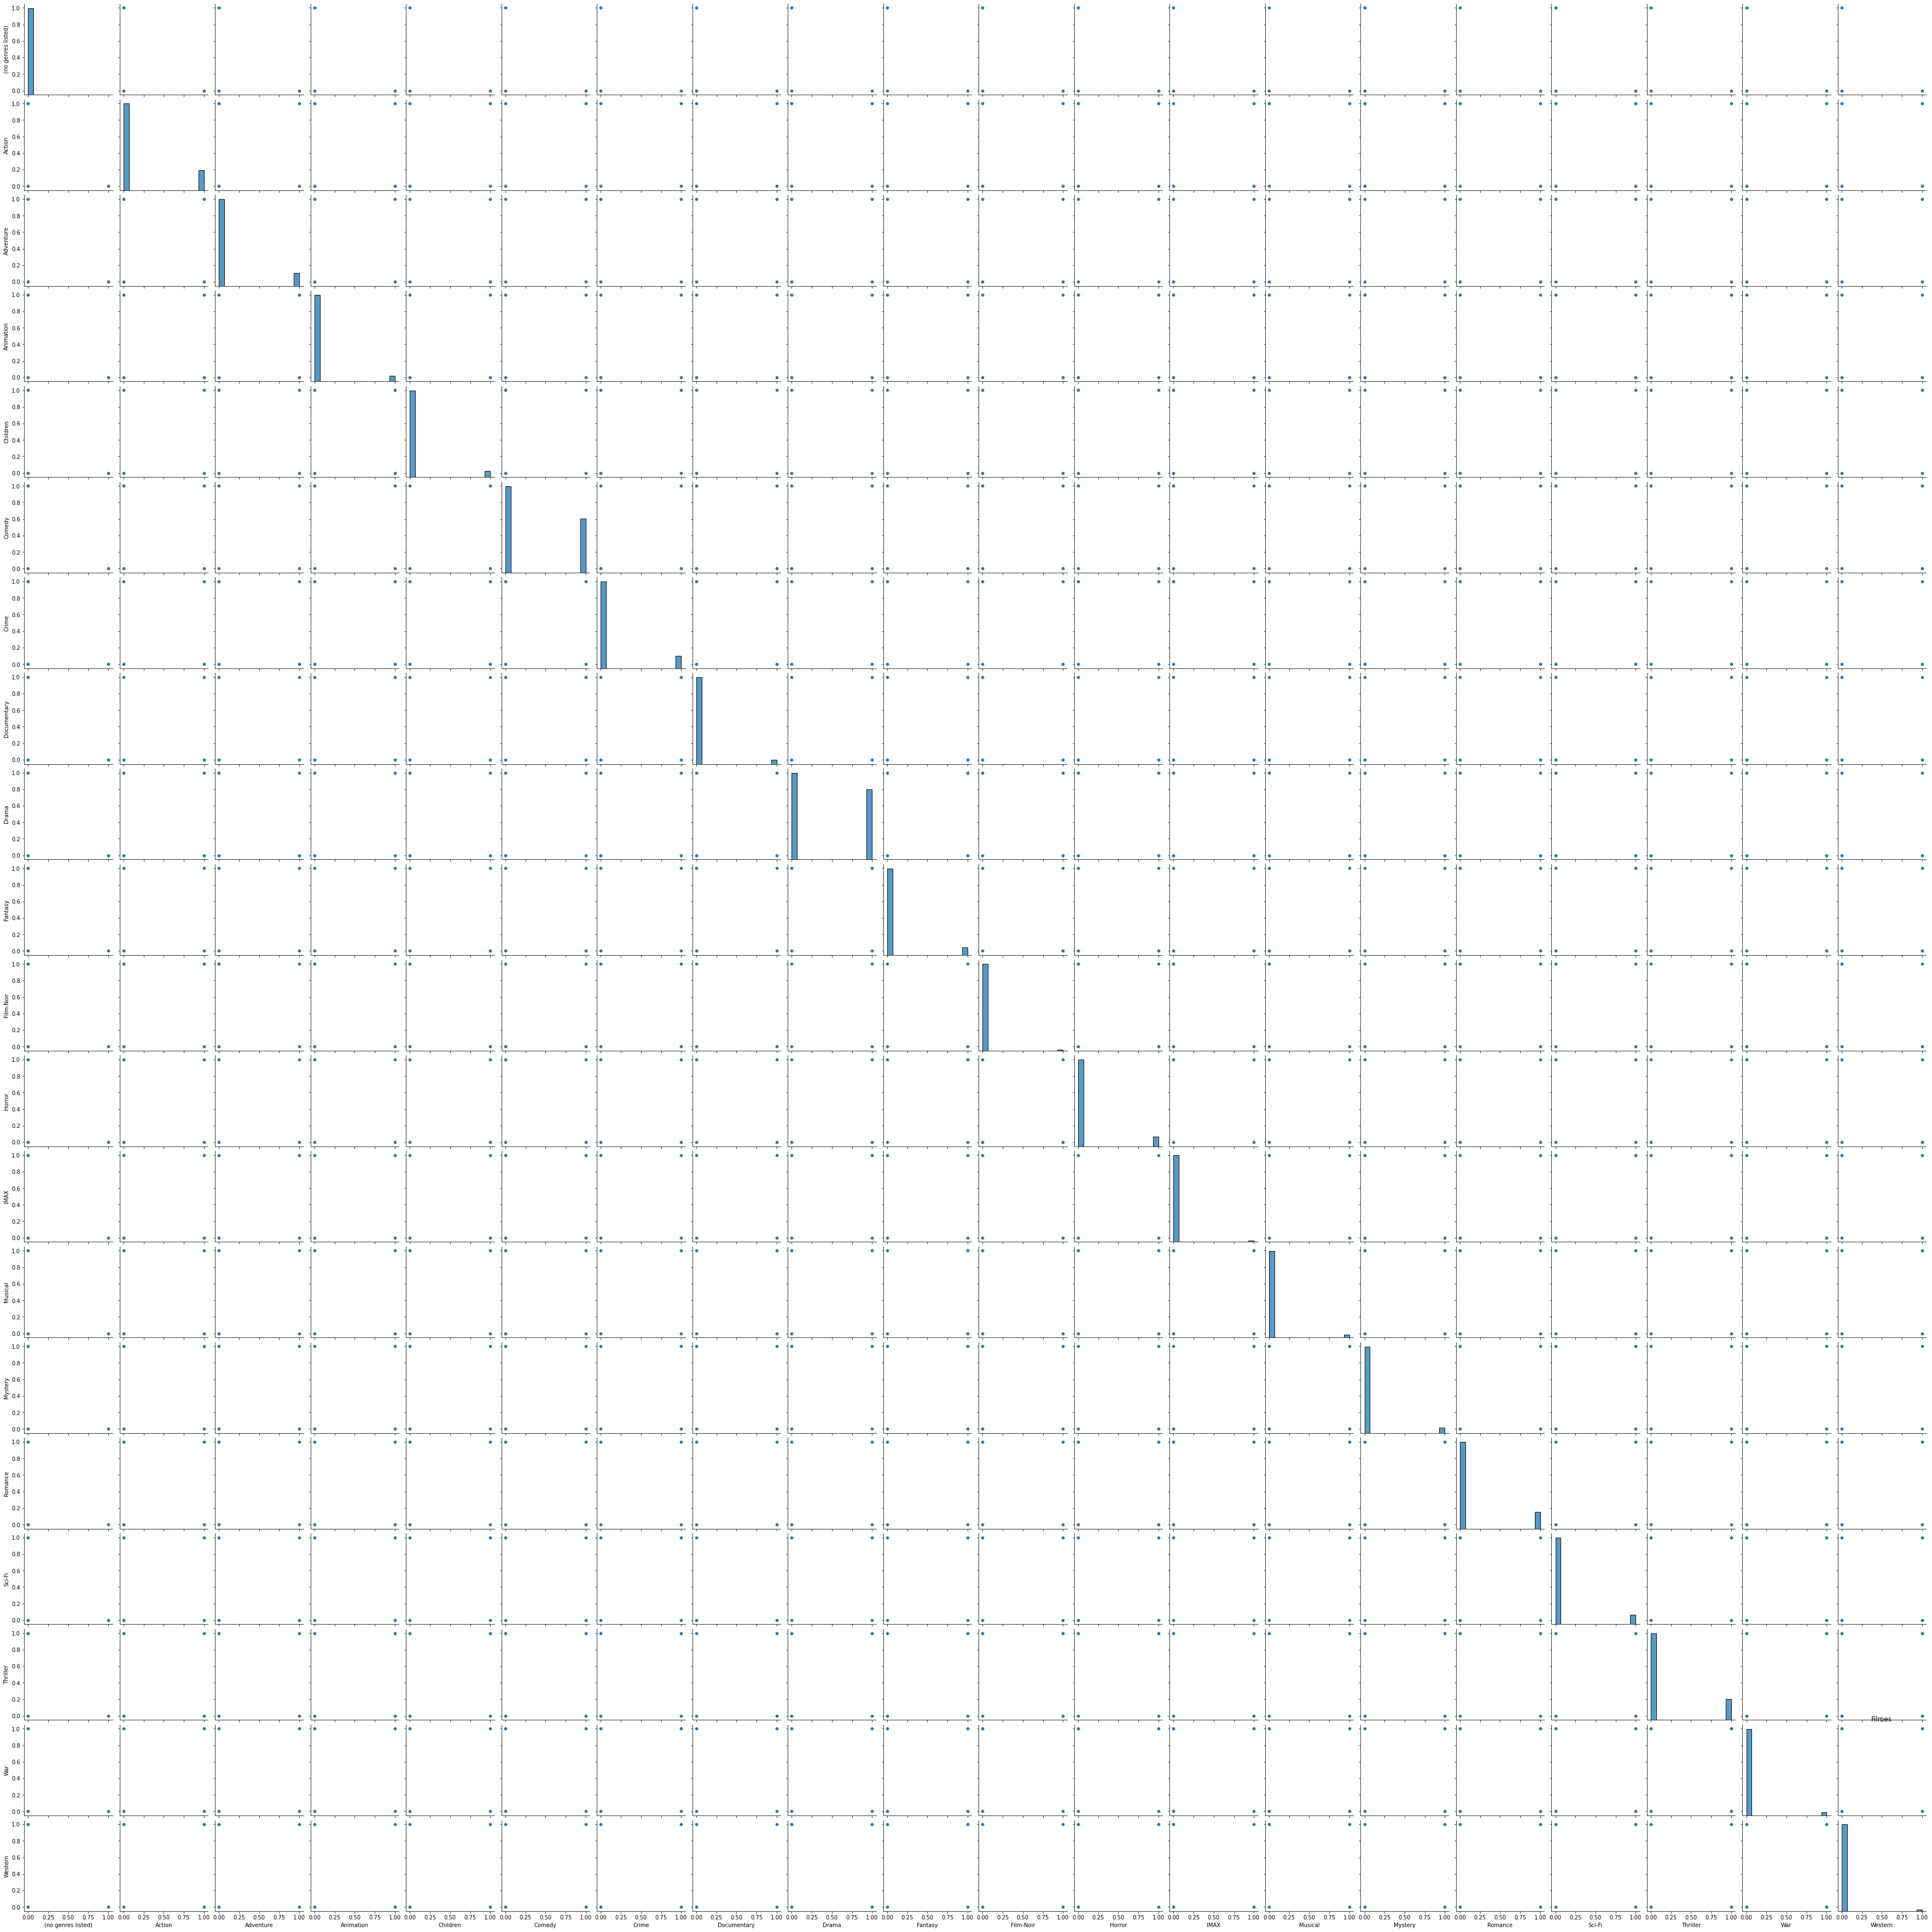

In [9]:
sns.pairplot(df_generos)
plt.title('Filmes')
plt.show()

Redimensionando os dados para 2D

In [10]:
from sklearn.manifold import  TSNE

In [11]:
tsne = TSNE()
plot = tsne.fit_transform(generos_escalados)

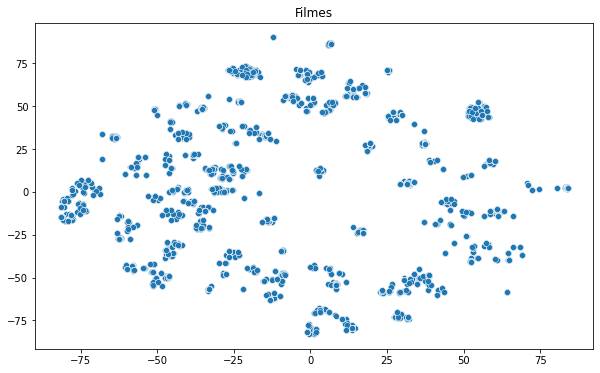

In [12]:
sns.scatterplot(x = plot[:,0], y= plot[:,1])
plt.title('Filmes')
plt.show()

##Clustering

### K-means

In [13]:
from sklearn.cluster import KMeans

Definindo o valor de K

In [14]:
def kmeans_k_test(k, x):
  modelo = KMeans(n_clusters= k)
  modelo.fit(x)
  return modelo.inertia_

K = np.arange(2,50)
resultados = [[k, kmeans_k_test(k, generos_escalados)] for k in K]
df_resultados_kmeans = pd.DataFrame(resultados, columns=['K', 'Inertia'])

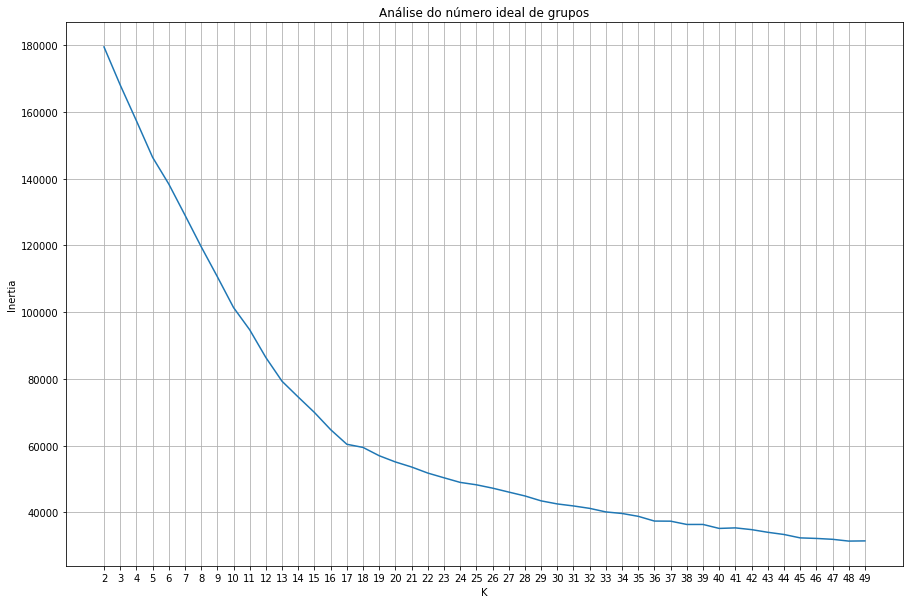

In [15]:
fig=plt.figure(figsize=(15,10))
sns.lineplot(x='K', y='Inertia', data=df_resultados_kmeans)
plt.title('Análise do número ideal de grupos')
plt.grid()
plt.xticks(K)
plt.show()

Elbow method: o número ideal de grupos pode ser apontado por uma 'quebra' na função, parecido com um cotovelo, como acontece para k= 18, 22 e 33. 

Agrupando

In [16]:
modelo_kmeans = KMeans(18)
clustering_kmeans = modelo_kmeans.fit(generos_escalados)

clusters_kmeans = clustering_kmeans.labels_

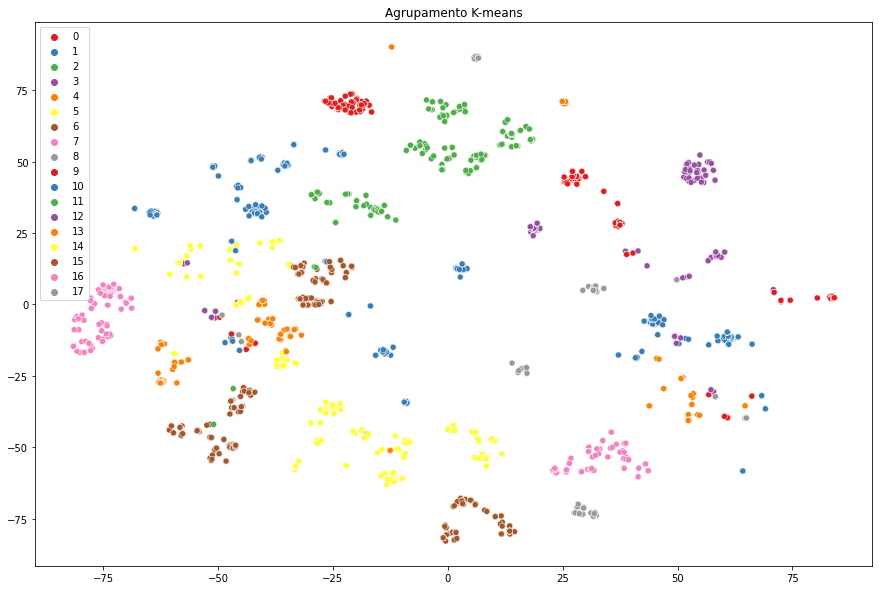

In [17]:
fig=plt.figure(figsize=(15,10))
sns.scatterplot(x = plot[:,0], y= plot[:,1],
                hue=clusters_kmeans, 
                palette=sns.color_palette('Set1', 18))
plt.title('Agrupamento K-means')
plt.show()

Analisando os centroides

In [18]:
centroids = clustering_kmeans.cluster_centers_
df_centroids = pd.DataFrame(centroids, columns= df_generos.columns)

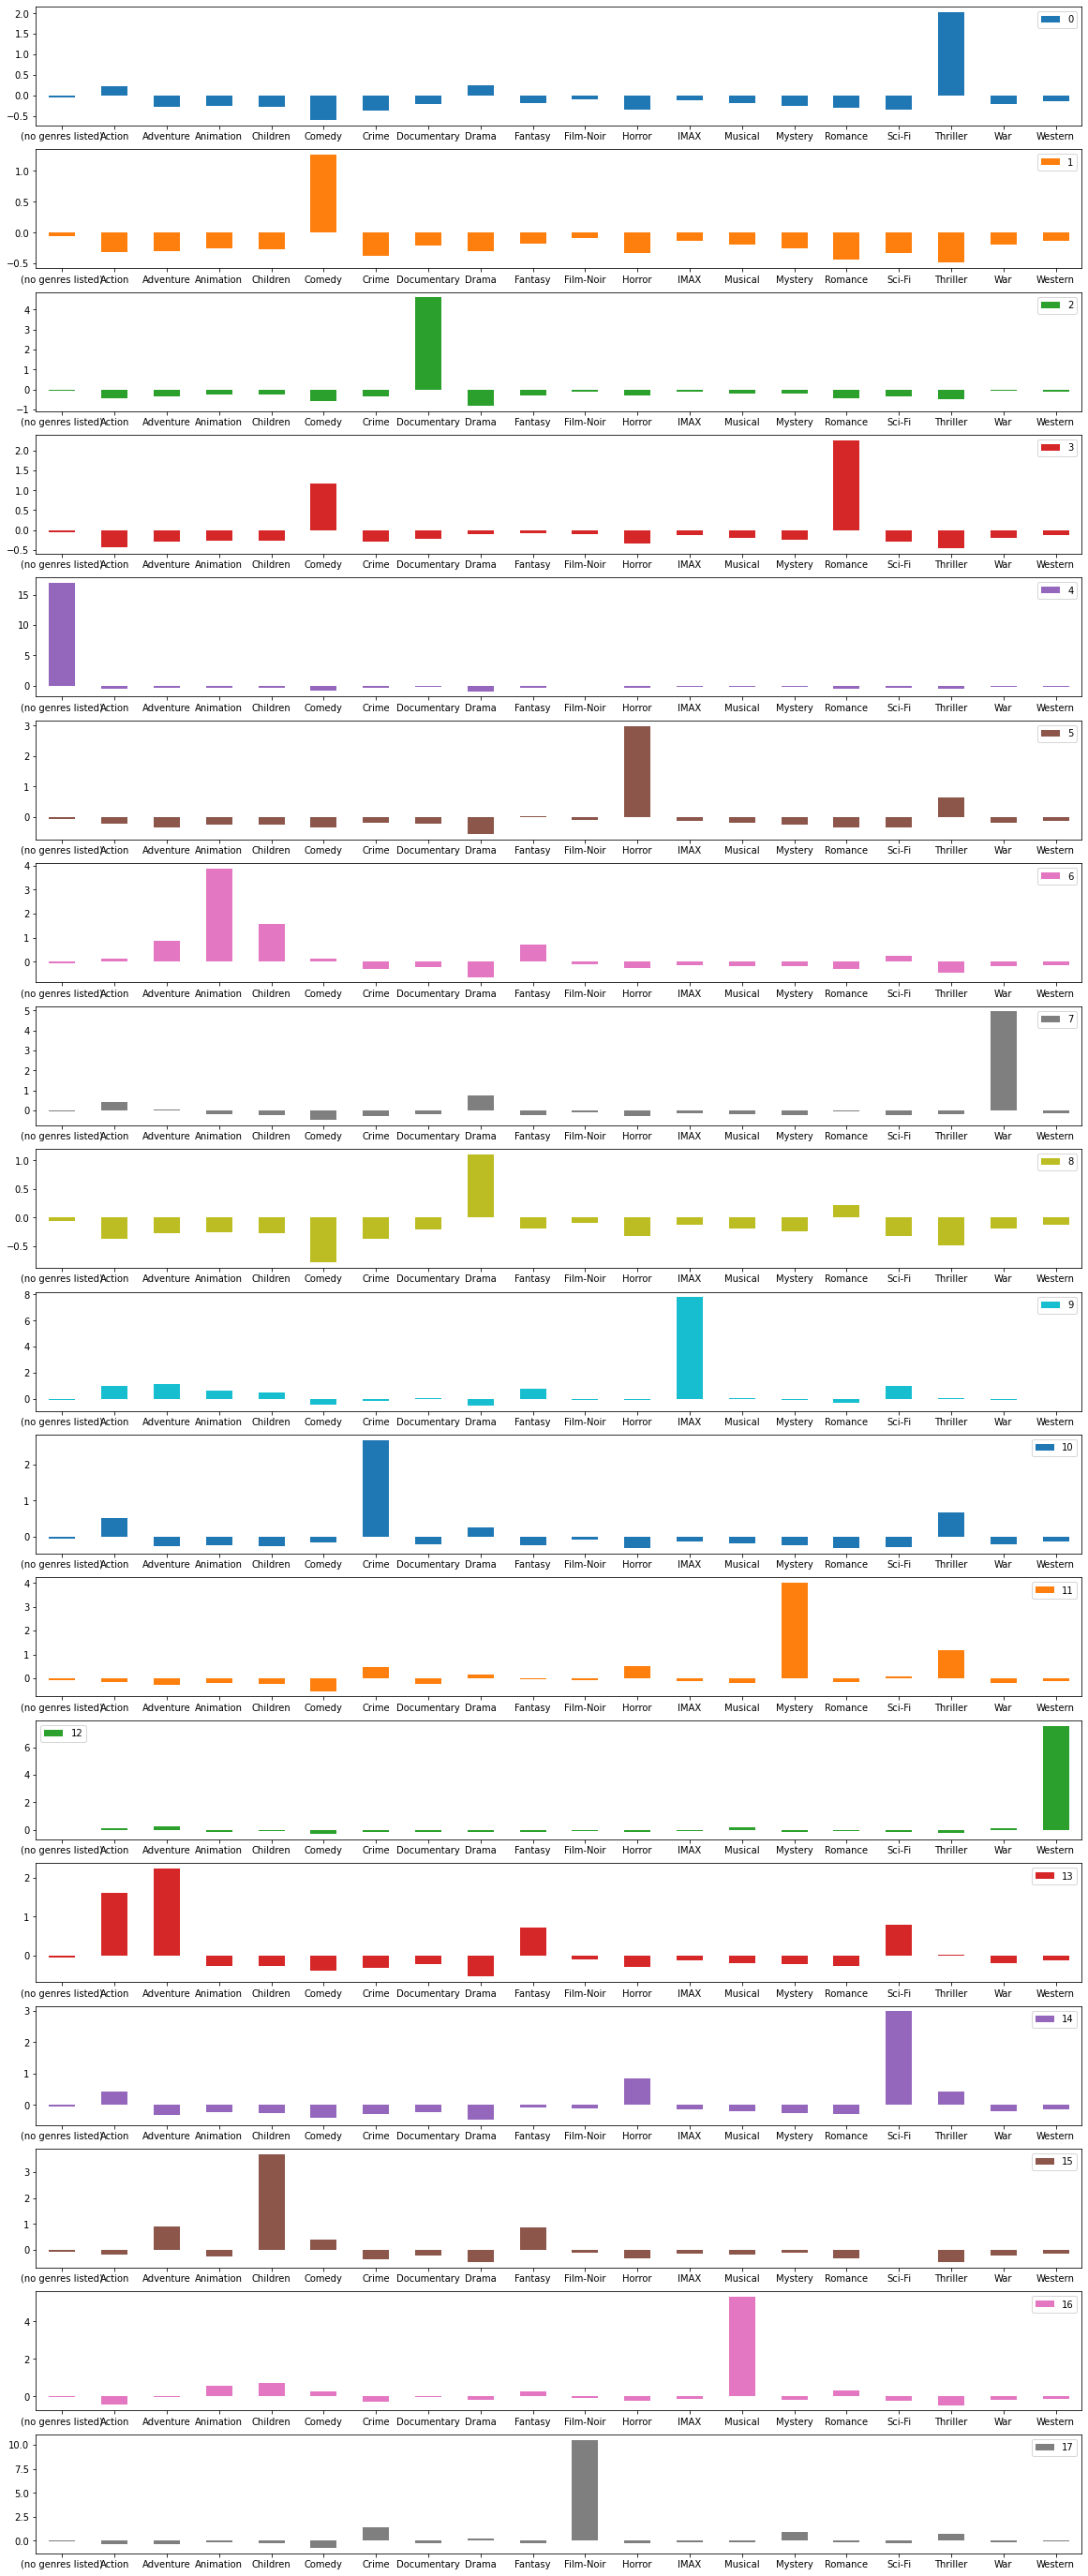

In [19]:
df_centroids.transpose().plot.bar(title =['']*(df_centroids.shape[1]-2), 
                                  subplots=True, sharex=False, 
                                  rot=0, figsize=(20, 50))
plt.show()

Particionando os filmes

In [20]:
df_filmes['K-means cluster'] = clusters_kmeans
grupos = []
for c, data in df_filmes.groupby('K-means cluster'):
  categorias_relevantes = (df_centroids
                           .loc[c]
                           .sort_values(ascending=False)
                           .index[
                                  df_centroids.loc[c].sort_values(ascending=False)>0
                                  ]
  )
  grupos.append([c, categorias_relevantes.values, data['title'].values])
df_grupos_kmeans = pd.DataFrame(grupos, columns=['Grupo', 'Categorias Relevantes', 'Filmes'])
df_grupos_kmeans.set_index('Grupo', drop=True, inplace=True)
df_grupos_kmeans

,Categorias Relevantes,Filmes
Grupo,,
0,"[Thriller, Drama, Action]","[To Die For (1995), Eye for an Eye (1996), Jur..."
1,[Comedy],"[Father of the Bride Part II (1995), Four Room..."
2,[Documentary],"[Nico Icon (1995), Heidi Fleiss: Hollywood Mad..."
3,"[Romance, Comedy]","[Grumpier Old Men (1995), Waiting to Exhale (1..."
4,[(no genres listed)],"[La cravate (1957), Ben-hur (2016), Pirates of..."
5,"[Horror, Thriller, Fantasy]","[Dracula: Dead and Loving It (1995), From Dusk..."
6,"[Animation, Children, Adventure, Fantasy, Sci-...","[Toy Story (1995), Balto (1995), Goofy Movie, ..."
7,"[War, Drama, Action, Adventure]","[Richard III (1995), Misérables, Les (1995), B..."
8,"[Drama, Romance]","[Nixon (1995), Sense and Sensibility (1995), L..."


### Agrupamento Hierárquico

In [21]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
modelo_AggC = AgglomerativeClustering(n_clusters=18)
clustering_AggC = modelo_AggC.fit(generos_escalados)
clusters_AggC = clustering_AggC.labels_

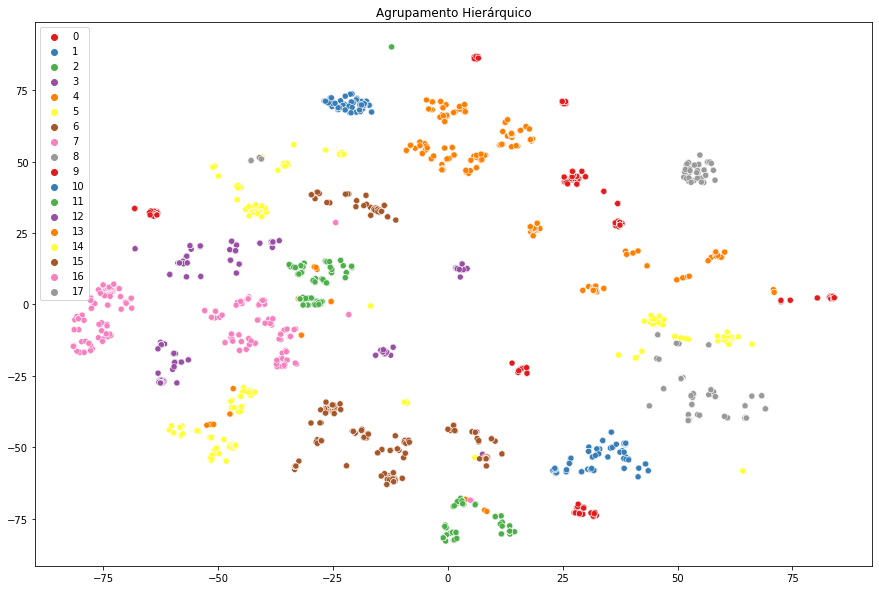

In [23]:
fig=plt.figure(figsize=(15,10))
sns.scatterplot(x=plot[:, 0],
               y=plot[:, 1],
               hue=clusters_AggC, 
               palette=sns.color_palette('Set1', 18))
plt.title('Agrupamento Hierárquico')
plt.show()

Visualizando a hierarquia 

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage

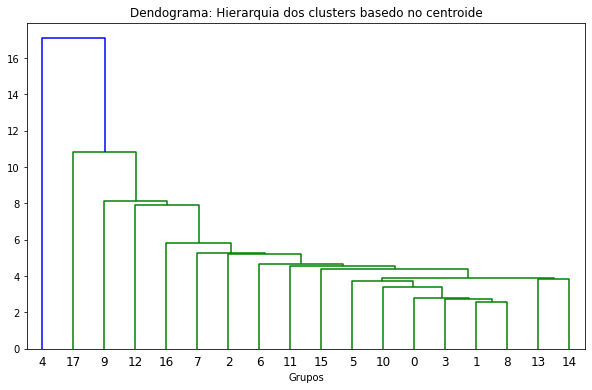

In [25]:
matriz_distancia = linkage(df_centroids)
dendograma = dendrogram(matriz_distancia)
dendograma
plt.title('Dendograma: Hierarquia dos clusters basedo no centroide')
plt.xlabel('Grupos')
plt.yticks()
plt.show()